# Anejos:
 ## Extracción, depuración y creación de la base de datos Accidentes de tránsito en Barcelona: 2013-2018

La primera fase consistió en crear una base de datos compuesta por tres datasets en formato `csv` donde señale las principales características asociadas a las personas afectadas, vehículos implicados y la localización de los accidentes registrados entre los años 2013 y 2018 :

- *personas.csv*
- *localización.csv*
- *vehículos.csv*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#Para eliminar los acentos en las cadenas
try:
    import unidecode
except:
    !pip install unidecode
    import unidecode
#Conversión de coordenadas UTM a latitud, longitud
try:
    import utm
except:
    !pip install utm
    import utm

Para ignorar las alertas 

In [2]:
import warnings
warnings.filterwarnings('ignore')

Programa auxiliar que ayuda a uniformizar las etiquetas de los atributos

In [3]:
def editando(word):
    word=word.replace('NK ','')
    word=word.replace(' caption','')
    word=word.replace('postal ','postal')
    word=word.replace('_ ','_')
    word=word.replace(' de ','_')
    word=word.replace(' ','_')
    word=word.replace("d'",'')
    word=word.replace('(Y)','Y')
    word=word.replace('(X)','X')
    word=word.replace('Coordenada_','')
    word=unidecode.unidecode(word)#elimina los acentos
    word=word.replace('Numero','Id')
    word=word.replace('Codi','Id')
    return word

<br>
<br>

# Primer paso: 
* Unir los archivos de las personas afectadas por año en un solo archivo
* Analizar las variables de los atributos excepto las coordenadas en UTM

Se tienen los siguientes datasets:
>- 2013_accidents_persones.csv
>- 2014_accidents_persones.csv
>- 2015_accidents_persones.csv
>- 2016_accidents_persones.csv
>- 2017_accidents_persones.csv
>- 2018_accidents_persones.csv

Eliminando las columnas que no son útiles:

In [4]:
eliminar_columnas_persones=['Codi districte','Codi_districte',
                            'Codi barri','Codi_barri',
                            'Codi carrer','Codi_carrer',
                            'Longitud','Latitud','Desc Tipus vehicle implicat',
                            'Descripcio_situacio','Desc_Tipus_vehicle_implicat',
                            'Desc. Tipus vehicle implicat','Dia setmana', 
                            'Dia_setmana','Descripció tipus dia',
                            'Descripcio_tipus_dia']

In [5]:
archivo= 'persones'
for año in range(2013,2019):
    dirreccion='{0}/{1}_accidents_{0}.csv'.format(archivo,año)
    sep=';'
    enc='iso-8859-15'
    if año== 2014:
        enc='IBM850'
    persones_año=pd.read_csv(dirreccion,sep=sep,encoding=enc)
    for columna in eliminar_columnas_persones:
        try:
            del persones_año[columna]
        except:
            pass
    columnas=persones_año.columns.tolist()
    columnas_editadas=list(map(editando,columnas))
    persones_año.columns=columnas_editadas
    if año == 2013:
        data_persones=persones_año
    else:
        data_persones=pd.concat([data_persones,persones_año],sort= True)  

In [6]:
n_i,n_a=data_persones.shape
print('Total atributos:{}'.format(n_a))
print('Total instancias:{}'.format(n_i))
data_persones.head(4)

Total atributos:19
Total instancias:70616


,Any,Descripcio_causa_vianant,Descripcio_dia_setmana,Descripcio_sexe,Descripcio_tipus_persona,Descripcio_torn,Descripcio_victimitzacio,Dia_mes,Edat,Hora_dia,Id_expedient,Mes_any,Nom_barri,Nom_carrer,Nom_districte,Nom_mes,Num_postal,UTM_X,UTM_Y
0,2013,No és causa del vianant,Dimecres,Home,Conductor,Nit,Ferit lleu,23,32,0,2013S000529,1,Sant Gervasi - Galvany,Augusta,Sarrià-Sant Gervasi,Gener,0061 0061,"429170,3","4583707,15"
1,2013,No és causa del vianant,Dimecres,Home,Conductor,Matí,Ferit lleu,23,39,7,2013S000535,1,el Camp de l'Arpa del Clot,Las Navas de Tolosa,Sant Martí,Gener,0329 0329,"431983,63","4585527,16"
2,2013,No és causa del vianant,Divendres,Dona,Vianant,Tarda,Ferit lleu,4,80,17,2013S000072,1,el Camp de l'Arpa del Clot,Enamorats,Sant Martí,Gener,0152 0152,"431991,79","4584645,89"
3,2013,No és causa del vianant,Divendres,Dona,Conductor,Tarda,Ferit lleu,4,23,18,2013S000074,1,la Dreta de l'Eixample,València,Eixample,Gener,0369 0369,"430849,53","4583597,13"


In [7]:
data_persones.dtypes

Any                          int64
Descripcio_causa_vianant    object
Descripcio_dia_setmana      object
Descripcio_sexe             object
Descripcio_tipus_persona    object
Descripcio_torn             object
Descripcio_victimitzacio    object
Dia_mes                      int64
Edat                        object
Hora_dia                     int64
Id_expedient                object
Mes_any                      int64
Nom_barri                   object
Nom_carrer                  object
Nom_districte               object
Nom_mes                     object
Num_postal                  object
UTM_X                       object
UTM_Y                       object
dtype: object

Averiguando la cantidad de valores nulos por atributo

In [8]:
data_persones.isnull().sum()

Any                             0
Descripcio_causa_vianant        0
Descripcio_dia_setmana          0
Descripcio_sexe                 0
Descripcio_tipus_persona        0
Descripcio_torn             23166
Descripcio_victimitzacio        0
Dia_mes                         0
Edat                            0
Hora_dia                        0
Id_expedient                    0
Mes_any                         0
Nom_barri                       0
Nom_carrer                     11
Nom_districte                   0
Nom_mes                         0
Num_postal                   7276
UTM_X                          17
UTM_Y                          17
dtype: int64

**Chequeano Description_torn**

Viendo la proporción del número de filas con valores nulos respecto al total de instancias del dataset:

In [9]:
ratio= data_persones.Descripcio_torn.isnull().sum()/len(data_persones)
print('Existe un {0:.0f} % con valores nulos'.format(ratio*100))

Existe un 33 % con valores nulos


Un tercio del total de este atributo son valores nulos y este atributo puede ser añadido a partir de los otros atributos extraidos.<br>
Por tanto, este atributo no será tomada en cuenta en el dataset `personas`<br>

**Añadiendo Fecha**:

In [10]:
data_persones['Fecha']=list(map(lambda Y,m,d: '{0}-{1}-{2}'.format(Y,m,d),
                                data_persones['Any'],data_persones['Mes_any'],
                                data_persones['Dia_mes']))
data_persones['Fecha']=pd.to_datetime(data_persones.Fecha,format='%Y-%m-%d')

In [11]:
data_persones.head(4)

,Any,Descripcio_causa_vianant,Descripcio_dia_setmana,Descripcio_sexe,Descripcio_tipus_persona,Descripcio_torn,Descripcio_victimitzacio,Dia_mes,Edat,Hora_dia,Id_expedient,Mes_any,Nom_barri,Nom_carrer,Nom_districte,Nom_mes,Num_postal,UTM_X,UTM_Y,Fecha
0,2013,No és causa del vianant,Dimecres,Home,Conductor,Nit,Ferit lleu,23,32,0,2013S000529,1,Sant Gervasi - Galvany,Augusta,Sarrià-Sant Gervasi,Gener,0061 0061,"429170,3","4583707,15",2013-01-23
1,2013,No és causa del vianant,Dimecres,Home,Conductor,Matí,Ferit lleu,23,39,7,2013S000535,1,el Camp de l'Arpa del Clot,Las Navas de Tolosa,Sant Martí,Gener,0329 0329,"431983,63","4585527,16",2013-01-23
2,2013,No és causa del vianant,Divendres,Dona,Vianant,Tarda,Ferit lleu,4,80,17,2013S000072,1,el Camp de l'Arpa del Clot,Enamorats,Sant Martí,Gener,0152 0152,"431991,79","4584645,89",2013-01-04
3,2013,No és causa del vianant,Divendres,Dona,Conductor,Tarda,Ferit lleu,4,23,18,2013S000074,1,la Dreta de l'Eixample,València,Eixample,Gener,0369 0369,"430849,53","4583597,13",2013-01-04


In [12]:
data_persones.columns

Index(['Any', 'Descripcio_causa_vianant', 'Descripcio_dia_setmana',
       'Descripcio_sexe', 'Descripcio_tipus_persona', 'Descripcio_torn',
       'Descripcio_victimitzacio', 'Dia_mes', 'Edat', 'Hora_dia',
       'Id_expedient', 'Mes_any', 'Nom_barri', 'Nom_carrer', 'Nom_districte',
       'Nom_mes', 'Num_postal', 'UTM_X', 'UTM_Y', 'Fecha'],
      dtype='object')

### Obsevando las variables
#### Id_expedient
Se aprecian los 20 expedientes con el mayor número de personas afectadas en un accidente 

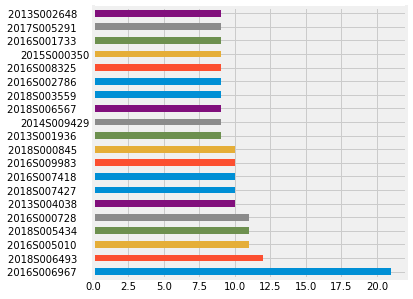

In [13]:
data_persones['Id_expedient'].value_counts().head(20).plot.barh(figsize=(5,5))
plt.show()

<br>

#### Any

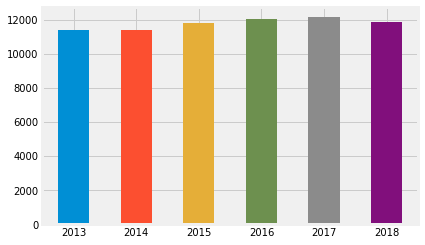

In [14]:
data_persones['Any'].value_counts(sort=False).plot(kind='bar',rot=0)
plt.show()

#### Mes_any

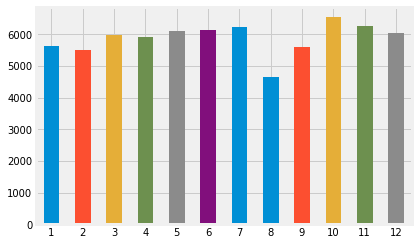

In [15]:
data_persones['Mes_any'].value_counts(sort=False).plot(kind='bar',rot=0)
plt.show()

#### Nom_mes

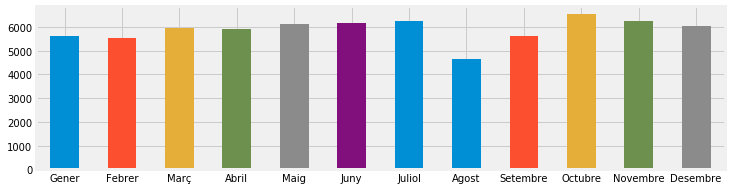

In [16]:
Nom_mes=data_persones['Nom_mes'].value_counts()
order_mes=['Gener','Febrer','Març','Abril','Maig','Juny','Juliol',
           'Agost','Setembre','Octubre','Novembre','Desembre']
Nom_mes.reindex(index=order_mes).plot.bar(figsize=(11,3),rot=0)
plt.show()

#### Dia_mes

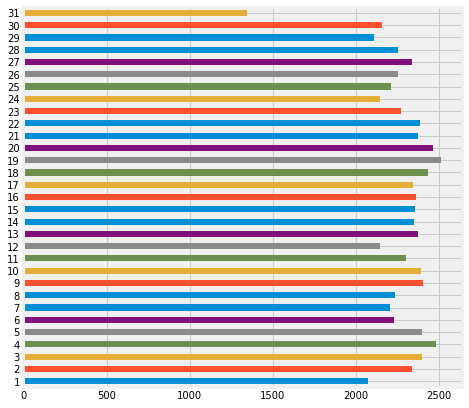

In [17]:
data_persones['Dia_mes'].value_counts(sort=False).plot(kind='barh',figsize=(7,7))
plt.show()

#### Hora_dia

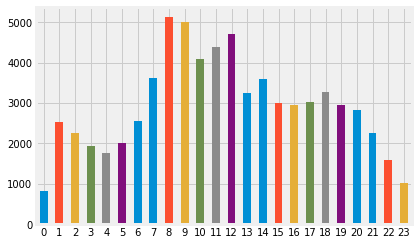

In [18]:
data_persones['Hora_dia'].value_counts(sort=False).plot(kind='bar',rot=0)
plt.show()

#### Descripcio_dia_setmana

In [19]:
dia_setmana=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte',
             'Diumenge']

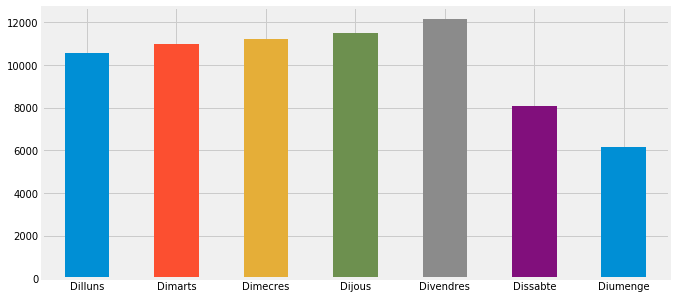

In [20]:
descripcio_dia_setmana=data_persones['Descripcio_dia_setmana'].value_counts()
descripcio_dia_setmana.reindex(index=dia_setmana).plot.bar(figsize=(10,5),rot=0)
plt.show()

#### Nom_carrer
Observando las 25 calles con el mayor número de víctimas 

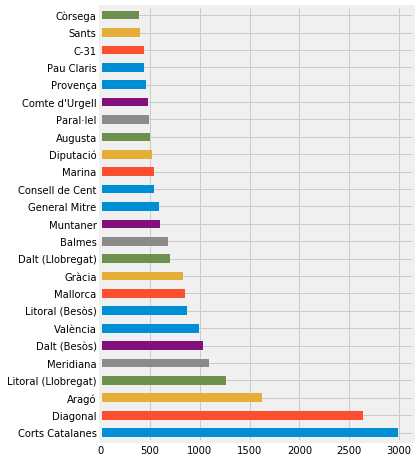

In [21]:
data_persones['Nom_carrer'].value_counts().head(25).plot.barh(figsize=(5,8))
plt.show()

Se aprecian variables repetidas, debe de ser por los espacios en blanco creados al final de texto como por ejemplo en el caso de `Corts Catalanes` y `Corts Catalanes `.<br>
Por tanto se procede a corregirlo

In [22]:
data_persones['Nom_carrer']= data_persones['Nom_carrer'].str.rstrip(' ')

Chequeando de nuevo:

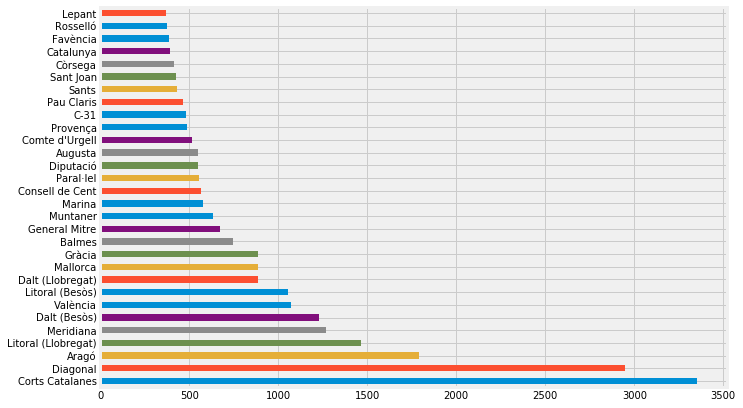

In [23]:
data_persones['Nom_carrer'].value_counts().head(30).plot.barh(figsize=(10,7))
plt.show()

Reemplazando los valores nulos por etiquetas llamados `desconegut`

In [24]:
data_persones['Nom_carrer'].fillna('desconegut',inplace=True)

#### Num_postal

In [25]:
data_persones['Num_postal'].value_counts().head()

0001 0001    1306
0002 0002    1014
9999 9999     619
0005 0005     480
0003 0003     428
Name: Num_postal, dtype: int64

In [26]:
data_persones['Num_postal'].value_counts().tail()

655           1
0250X0250X    1
K154          1
K119          1
0090X0090X    1
Name: Num_postal, dtype: int64

In [27]:
data_persones['Num_postal'].unique()

array(['0061 0061', '0329 0329', '0152 0152', ..., '73X       ', '307',
       '393-397   '], dtype=object)

No se aprecia un patron que identifique al número postal. Por tanto, **¡este atributo no será tomado en cuenta!**.

#### Nom_barri

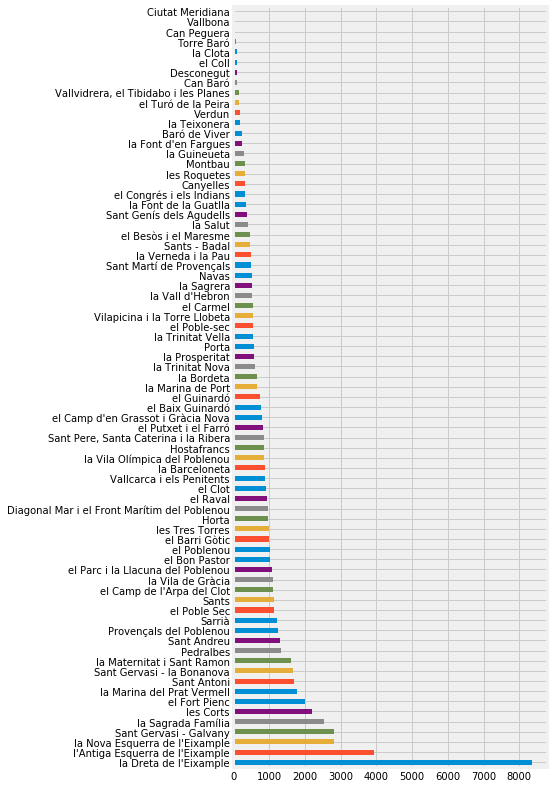

In [28]:
data_persones['Nom_barri'].value_counts().plot(kind='barh',figsize=(5,14))
plt.show()

#### Nom_districte

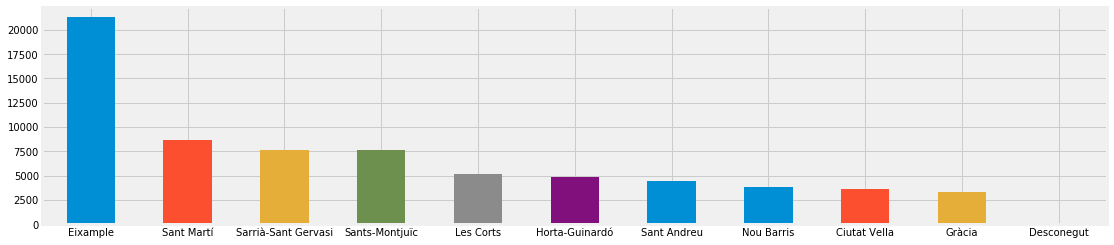

In [29]:
data_persones['Nom_districte'].value_counts().plot.bar(figsize=(17,4),rot=0)
plt.show()

#### Descripcio_sexe

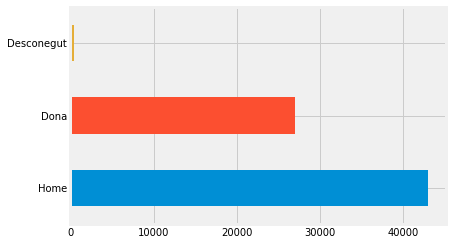

In [30]:
data_persones['Descripcio_sexe'].value_counts().plot(kind='barh')
plt.show()

#### Edat
Chequeando las 20 edades más comunes de las personas implicadas en los accidentes 

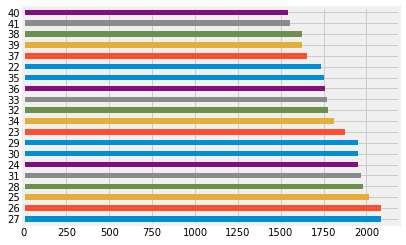

In [31]:
data_persones['Edat'].value_counts().head(20).plot(kind='barh')
plt.show()

<br>
<br>

#### Descripcio_tipus_persona

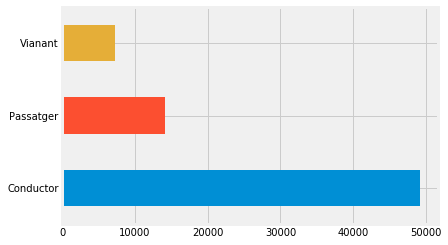

In [32]:
data_persones['Descripcio_tipus_persona'].value_counts().plot.barh()
plt.show()

#### Descripcio_causa_vianant

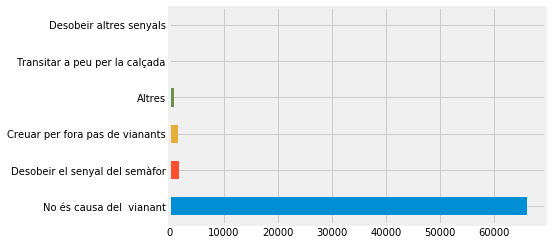

In [33]:
data_persones['Descripcio_causa_vianant'].value_counts().plot(kind='barh')
plt.show()

#### Descripcio_victimitzacio

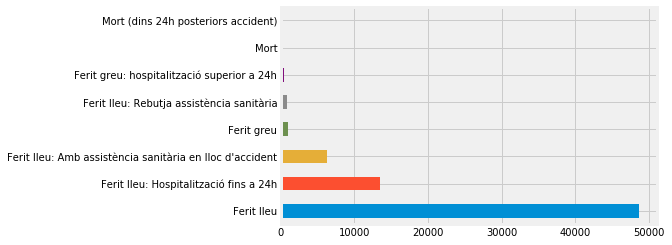

In [34]:
data_persones['Descripcio_victimitzacio'].value_counts().plot('barh')
plt.show()

Debido a que no hay uniformidad de criterio respecto a los años anteriores.Se procederá a reagrupar las variables del siguiente orden:

***Ferit lleu***:

- Ferit lleu
- Ferit lleu: Hospitalitzacio fins a 24h
- Ferit lleu:Amb assitencia sanitària en lloc d'accident
- Ferit lleu: Rebutja assistencia sanitaria

***Ferit greu***:
- Ferit greu
- Ferit: hospitalització superior a 24h

***Mort***:
- Mort
- Mort (dins 24h posteriors  accident)

Y asignandole al atributo llamado `Descripcio_victimes`

In [35]:
Descripcio_victimes=[]
for index in range(len(data_persones)):
    Descripcio_victimitzacio=data_persones['Descripcio_victimitzacio'].iloc[index]
    if 'Ferit lleu' in Descripcio_victimitzacio:
        Descripcio_victimes.append('Ferit lleu')
    elif 'Ferit greu' in Descripcio_victimitzacio:
        Descripcio_victimes.append('Ferit greu')
    else:
        Descripcio_victimes.append('Mort')
data_persones['Descripcio_victimes']= Descripcio_victimes

#### Descripcio_victimes

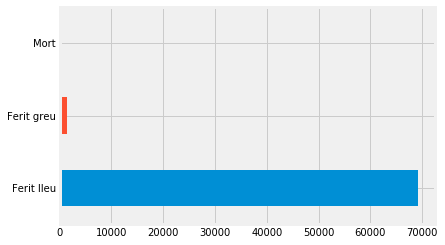

In [36]:
data_persones['Descripcio_victimes'].value_counts().plot(kind='barh')
plt.show()

Creando los datasets:
## 1.Personas
Tendrá los siguientes atributos:
- Id_expedient
- Descripcio_sexe
- Edat
- Descripcio_tipus_persona
- Descripcio_causa_vianant
- Descripcio_victimitzacio
- Descripcio_victimes

In [37]:
persones_atributos=['Id_expedient','Descripcio_sexe','Edat',
                    'Descripcio_tipus_persona','Descripcio_causa_vianant',
                    'Descripcio_victimitzacio','Descripcio_victimes']

Enviando un archivo csv exceptuando las coordenadas UTM llamado `personas.csv`

In [38]:
pd.DataFrame(data_persones,columns=persones_atributos).to_csv('personas.csv',
                                                              index= False,
                                                              encoding='latin-1')

# Segundo paso: 
* Construyendo el dataset sobre las características de espacio y tiempo en el accidente
* Editando las variables de coordenadas UTM
* Crear los atributos de Latitud y Longitud

In [39]:
localizacion_atributos=['Id_expedient','Fecha','Any','Mes_any','Nom_mes',
                        'Dia_mes','Hora_dia','Descripcio_dia_setmana',
                        'Nom_carrer','Nom_barri','Nom_districte','UTM_X',
                        'UTM_Y']
localizacion= pd.DataFrame(data_persones,columns=localizacion_atributos)

Observando el cantidad de valores nulos 

In [40]:
localizacion.isnull().sum()

Id_expedient               0
Fecha                      0
Any                        0
Mes_any                    0
Nom_mes                    0
Dia_mes                    0
Hora_dia                   0
Descripcio_dia_setmana     0
Nom_carrer                 0
Nom_barri                  0
Nom_districte              0
UTM_X                     17
UTM_Y                     17
dtype: int64

Observando al detalle:

In [41]:
localizacion[pd.isnull(localizacion).any(axis=1)]

,Id_expedient,Fecha,Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_dia_setmana,Nom_carrer,Nom_barri,Nom_districte,UTM_X,UTM_Y
87,2017S000075,2017-01-04,2017,1,Gener,4,14,Dimecres,Desconegut,la Nova Esquerra de l'Eixample,Eixample,NaN,NaN
308,2017S000252,2017-01-11,2017,1,Gener,11,14,Dimecres,desconegut,Desconegut,Desconegut,NaN,NaN
504,2017S000419,2017-01-16,2017,1,Gener,16,17,Dilluns,Desconegut,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,NaN,NaN
1584,2017S001374,2017-02-18,2017,2,Febrer,18,18,Dissabte,Desconegut,Sant Antoni,Eixample,NaN,NaN
1591,2017S001379,2017-02-18,2017,2,Febrer,18,21,Dissabte,Desconegut,la Dreta de l'Eixample,Eixample,NaN,NaN
1692,2017S001469,2017-02-22,2017,2,Febrer,22,12,Dimecres,Desconegut,la Teixonera,Horta-Guinardó,NaN,NaN
2014,2017S001749,2017-03-03,2017,3,Març,3,14,Divendres,Desconegut,les Roquetes,Nou Barris,NaN,NaN
4132,2017S004015,2017-05-06,2017,5,Maig,6,14,Dissabte,desconegut,Desconegut,Desconegut,NaN,NaN
4133,2017S004015,2017-05-06,2017,5,Maig,6,14,Dissabte,desconegut,Desconegut,Desconegut,NaN,NaN
4134,2017S004015,2017-05-06,2017,5,Maig,6,14,Dissabte,desconegut,Desconegut,Desconegut,NaN,NaN


Todos los valores nulos corresponden al año **2017**.
<br>
Procediendo a su eliminación

In [42]:
localizacion=localizacion.dropna(axis=0)

Eliminando las filas repetidas en función del Id_expedient: 

In [43]:
localizacion.drop_duplicates(subset ="Id_expedient", keep = False, inplace = True) 

Cambiando `','` por `'.'`:

In [44]:
localizacion['UTM_X']=list(map(lambda cadena: str(cadena).replace(',','.'),
                               localizacion['UTM_X']))
localizacion['UTM_Y']=list(map(lambda cadena: str(cadena).replace(',','.'),
                               localizacion['UTM_Y']))

Consiguiendo una lista de índices donde las variables UTM no son decimales:

In [45]:
nofloat=[]
for index in range(len(localizacion)):
    x=localizacion['UTM_X'].iloc[index]
    y=localizacion['UTM_Y'].iloc[index]
    if '-1' in x or '-1' in y:
        nofloat.append(index)
    try:
        float(x)
        float(y)
    except:
        nofloat.append(index)

In [46]:
print('Hay un total de {} instancias irregulares'.format(len(nofloat)))

Hay un total de 129 instancias irregulares


In [47]:
localizacion['UTM_X'].iloc[nofloat].value_counts()

-1            118
Desconegut     11
Name: UTM_X, dtype: int64

In [48]:
localizacion['UTM_Y'].iloc[nofloat].value_counts()

-1            118
Desconegut     11
Name: UTM_Y, dtype: int64

Se procede a eliminarlos

In [49]:
localizacion=localizacion.drop(localizacion.index[nofloat])

In [50]:
print('Existen un total de {} filas'.format(len(localizacion)))

Existen un total de 42048 filas


Convirtiendo a numéricos decimales

In [51]:
localizacion[['UTM_X','UTM_Y']]=localizacion[['UTM_X','UTM_Y']].astype(float)
#data_persones['UTM_X']=pd.to_numeric(data_persones['UTM_X'],errors='coerce')
#data_persones['UTM_Y']=pd.to_numeric(data_persones['UTM_Y'],errors='coerce')

Observando ambos atributos `UTM_X` y `UTM_Y`

In [52]:
localizacion[['UTM_X','UTM_Y']].describe()

,UTM_X,UTM_Y
count,42048.000000,4.204800e+04
mean,430074.631397,4.583571e+06
std,1959.948631,2.307967e+03
min,423466.220000,4.575063e+06
25%,428655.700000,4.582129e+06
50%,430119.390000,4.583312e+06
75%,431476.227500,4.584781e+06
max,435128.660000,4.591251e+06


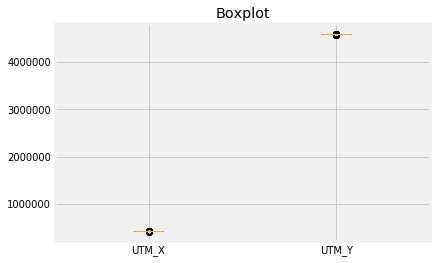

In [53]:
localizacion[['UTM_X','UTM_Y']].plot(kind='box',title='Boxplot')
plt.show()

Calculando la `Latitud`,`Longitud` y añadiendo los atributos que llevan los mismos nombres

In [54]:
Latitud=[]
Longitud=[]
for index in range(len(localizacion)):
    x= localizacion.UTM_X.iloc[index]
    y= localizacion.UTM_Y.iloc[index]
    lat, long = utm.to_latlon(x,y,zone_number=31,zone_letter='T')
    #31 y T son parámetros que corresponden a BCN
    Latitud.append(lat)
    Longitud.append(long)

In [55]:
localizacion['Latitud']=Latitud
localizacion['Longitud']=Longitud

Chequeando el número de datos por año

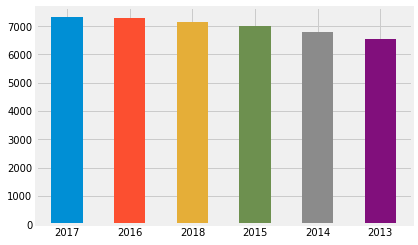

In [56]:
localizacion['Any'].value_counts().plot.bar(rot=0)
plt.show()

Eliminando los atributos de coordenadas UTM

In [57]:
localizacion=localizacion.drop(['UTM_X','UTM_Y'],axis=1)

## 2.Localización

Tendrá los siguientes atributos:
- Id_expedient
- Fecha
- Any
- Mes_any
- Nom_mes
- Dia_mes
- Hora_dia
- Descripcio_dia_setmana
- Nom_carrer
- Nom_barri
- Nom_districte
- Latitud
- Longitud

Enviando a un archivo csv:

In [58]:
localizacion.to_csv('localizacion.csv',index= False,encoding='Latin-1')

# Tercer paso
Analogamente con los primeros 6 archivos sobre personas afectadas, se procede a extraer y chequear solo los datos relacionados a los vehículos implicados
<br>

Se tienen los siguientes datasets en el archivo `vehicles`:

>- 2013_accidents_vehicles.csv
>- 2014_accidents_vehicles.csv
>- 2015_accidents_vehicles.csv
>- 2016_accidents_vehicles.csv
>- 2017_accidents_vehicles.csv
>- 2018_accidents_vehicles.csv

In [59]:
#Las columnas que no son útiles:
eliminar_columnas_vehicles=['Codi districte','Codi barri','Nom barri', 'Nom_barri',
                            'Codi carrer','Nom carrer','Num postal caption', 
                            'Num_postal',' Longitud',' Latitud','Codi_districte',
                            'Codi_barri','Nom_carrer','Codi_carrer','Num_postal ',
                            'Descripcio_situacio','Nom_districte','Nom districte',
                            'NK Any','Any','Dia de mes','Dia_mes','Nom mes',
                            'Nom_mes','Descripcio_dia_setmana',
                            'Descripcio dia setmana','Mes de any','Mes_any',
                            'Hora de dia','Hora_dia','Desc. Tipus vehicle implicat',
                            'Dia setmana', 'Dia_setmana','Descripció tipus dia',
                            'Descripcio_tipus_dia','Descripcio_torn',
                            'Coordenada UTM (X)','Coordenada UTM (Y)',
                            'Coordenada_UTM_X','Coordenada_UTM_Y',
                            'Longitud','Latitud']

In [60]:
archivo= 'vehicles'
for año in range(2013,2019):
    dirreccion='{0}/{1}_accidents_{0}.csv'.format(archivo,año)
    sep=';'
    enc='iso-8859-15'
    if año== 2015:
        sep=','
    vehicles_año=pd.read_csv(dirreccion,sep=sep,encoding=enc)
    for columna in eliminar_columnas_vehicles:
        try:
            del vehicles_año[columna]
        except:
            pass
    columnas=vehicles_año.columns.tolist()
    columnas_editadas=list(map(editando,columnas))
    vehicles_año.columns=columnas_editadas
    if año == 2013:
        data_vehicles=vehicles_año
    else:
        data_vehicles=pd.concat([data_vehicles,vehicles_año],sort= True)  

In [61]:
data_vehicles.head(4)

,Antiguitat_carnet,Descripcio_carnet,Descripcio_causa_vianant,Descripcio_color,Descripcio_dia_setmana,Descripcio_marca,Descripcio_model,Descripcio_tipus_vehicle,Id_expedient
0,34,A,Altres,Platejat,Dilluns,APRILIA,SCARABEO 125,Motocicleta,2013S003321
1,18,B,No és causa del vianant,Negre,Dimecres,YAMAHA,CYGNUS 125,Motocicleta,2013S000550
2,21,B,No és causa del vianant,Gris,Dimecres,BMW,320,Turismo,2013S000552
3,22,A,No és causa del vianant,Negre,Dimecres,HONDA,SH 125,Motocicleta,2013S000555


In [62]:
data_vehicles.dtypes

Antiguitat_carnet           object
Descripcio_carnet           object
Descripcio_causa_vianant    object
Descripcio_color            object
Descripcio_dia_setmana      object
Descripcio_marca            object
Descripcio_model            object
Descripcio_tipus_vehicle    object
Id_expedient                object
dtype: object

## Observando las variables
#### Id_expedient
Observando los 20 incidentes con el mayor número de vehículos implicados 

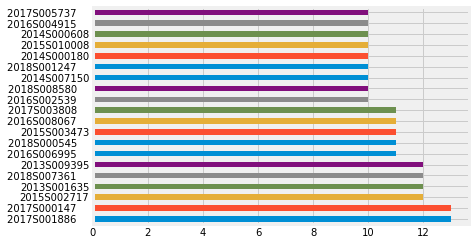

In [63]:
data_vehicles['Id_expedient'].value_counts().head(20).plot.barh()
plt.show()

#### Descripcio_tipus_vehicle

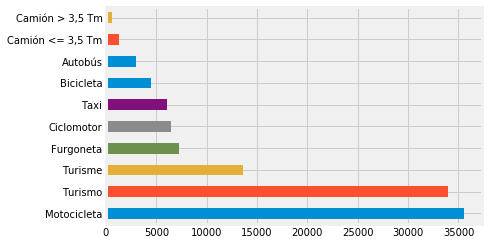

In [64]:
data_vehicles['Descripcio_tipus_vehicle'].value_counts().head(10).plot.barh()
plt.show()

#### Descripcio_carnet

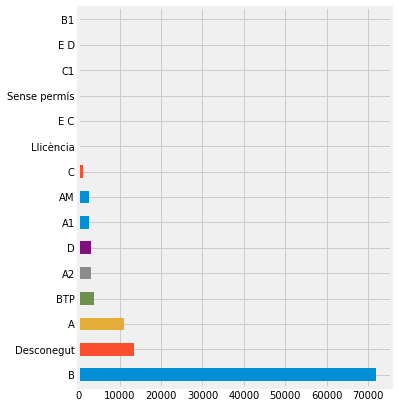

In [65]:
data_vehicles['Descripcio_carnet'].value_counts().head(15).plot.barh(figsize=(5,7))
plt.show()

#### Descripcio_color

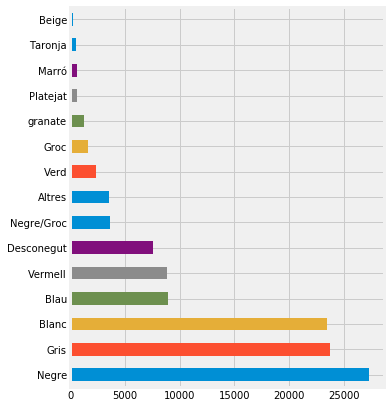

In [66]:
data_vehicles['Descripcio_color'].value_counts().head(15).plot.barh(figsize=(5,7))
plt.show()

#### Descripcio_marca 

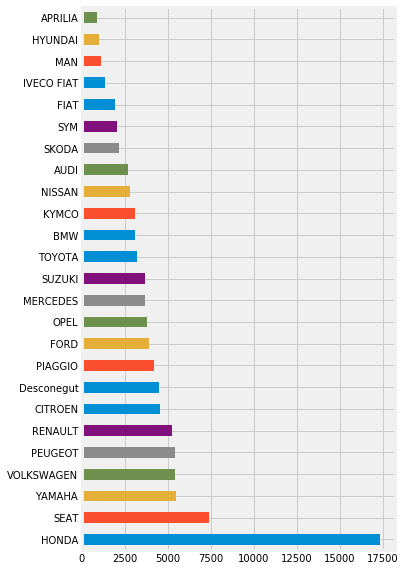

In [67]:
data_vehicles['Descripcio_marca'].value_counts().head(25).plot.barh(figsize=(5,10))
plt.show()


#### Descripcio_model

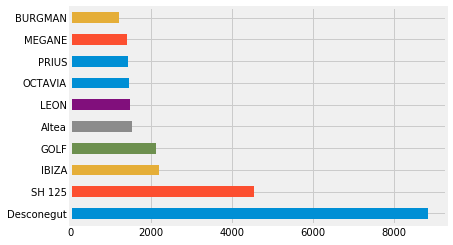

In [68]:
data_vehicles['Descripcio_model'].value_counts().head(10).plot.barh()
plt.show()

#### Antiguitat carnet

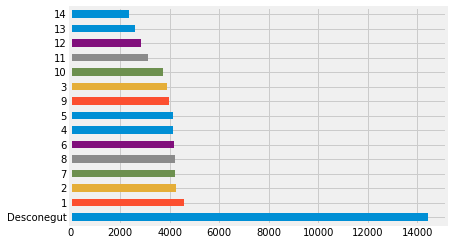

In [69]:
data_vehicles['Antiguitat_carnet'].value_counts().head(15).plot.barh()
plt.show()

Existen valores negativos, por lo que asumo que el valor correcto corresponde a su valor absoluto.<br>
Por tanto, se procede a la transformación a valores positivos

In [70]:
data_vehicles['Antiguitat_carnet']=data_vehicles['Antiguitat_carnet'].str.replace('-',
                                                                                  '')

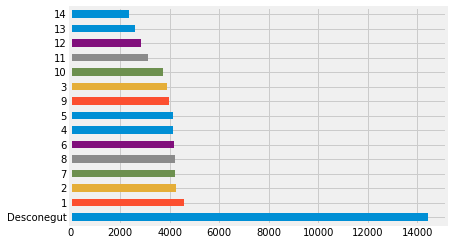

In [71]:
data_vehicles['Antiguitat_carnet'].value_counts().head(15).plot.barh()
plt.show()

## 3. Vehículos
Contiene los siguientes atributos:
* Id_expedient
* Descripcio_tipus_vehicle
* Descripcio_carnet
* Descripcio_color
* Descripcio_marca
* Descripcio_model
* Antiguitat_carnet

In [72]:
atributos_considerados=['Id_expedient','Descripcio_tipus_vehicle',
                        'Descripcio_carnet','Descripcio_color',
                        'Descripcio_marca','Descripcio_model',
                        'Antiguitat_carnet']

Creando el archivo csv llamado `vehiculos.csv`

In [73]:
pd.DataFrame(data_vehicles, columns= atributos_considerados).to_csv('vehiculos.csv',
                                                                    index=False,
                                                                    encoding='Latin-1')